# Looi Kah Fung_Lab 5 SVM_P-COM0049/22

CRISP-DM Methodology 
#Business understanding
The data set comes from teaching assistant evaluation of the Statistics Department, University of
Wilconsin-Madison. The data set is composed of 151 rows of data or examples or instances.
Each instance corresponds to a teaching assistant evaluation from a course. Each instance
describes features/attributes of an object or entity, which in our case here is a teaching assistant
evaluation. In the TEA data set, there are six attributes including the class attribute indicating the
class/category information.

#Data understanding
Quantitative attribute - comprised of discrete & continuous
Qualitative attribute - comprised of ordinal & nominal
Native speaker - nominal 
Course instructor -discrete 
Course - discrete 
Semesterr - nominal 
Class Size - discrete 
Class - ordinal 
https://t4tutorials.com/attributes-types-in-data-mining/

In [6]:
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 

df= pd.read_csv("tae.csv")

In [7]:
#describe the data
df.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [8]:
#print the 1st 5 rows 
df.head(5)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [9]:
#retrieve the preliminary info of the dataset 
df.info

<bound method DataFrame.info of      Native Speaker  Course instructor  Course  Semesterr  Class Size  Class
0                 1                 23       3          1          19      3
1                 2                 15       3          1          17      3
2                 1                 23       3          2          49      3
3                 1                  5       2          2          33      3
4                 2                  7      11          2          55      3
..              ...                ...     ...        ...         ...    ...
146               2                  3       2          2          26      1
147               2                 10       3          2          12      1
148               1                 18       7          2          48      1
149               2                 22       1          2          51      1
150               2                  2      10          2          27      1

[151 rows x 6 columns]>

In [10]:
#print the 1st 5 rows 
df.head(5)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [18]:
#count observations based on attribute 
df['Class'].value_counts()

3    52
2    50
1    49
Name: Class, dtype: int64

In [19]:
#select rows from dataframe, exclude the last attribute 
X=df.iloc[:,:-1]
# sum of null data based on attributes 
X.isnull().sum()

Native Speaker       0
Course instructor    0
Course               0
Semesterr            0
Class Size           0
dtype: int64

In [22]:
y_train.nunique()

3

#Modelling 

In [23]:
#Training dataset 
#select all columns except the last one 
X= df.drop("Class", axis=1)
#set target categorical data label (6th attribute)
y= df["Class"]

#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) #data imbalance, add a new argument stratify = y 

In [24]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
76                2                  5       2          2          48
18                2                 13       3          1          10
82                2                 13       3          1          11
81                2                  9       2          2          39
143               2                  3       2          2          37
31                2                 18       5          2          19
78                1                 23       3          1          25
64                2                  7      11          2          13
55                2                  7      11          2          10
85                2                  7      11          1          20
45                2                  9       5          2          19
12                2                 18      21          2          29
36                2                  4      16          2 

In [25]:
y_train.value_counts()

3    36
1    35
2    34
Name: Class, dtype: int64

In [26]:
y_train.shape

(105,)

Evaluation

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
yfit = svm.predict(X_test)
yfit.shape

(46,)

Confusion Matrix

In [28]:
# import classification report metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           1       0.38      0.64      0.47        14
           2       0.44      0.25      0.32        16
           3       0.31      0.25      0.28        16

    accuracy                           0.37        46
   macro avg       0.38      0.38      0.36        46
weighted avg       0.38      0.37      0.35        46



<AxesSubplot:>

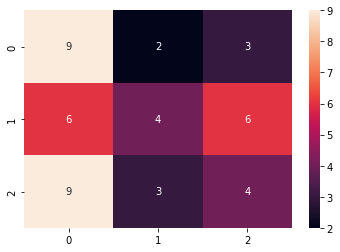

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
# predict the classes of new, unseen data
# Creates a confusion matrix
cm = confusion_matrix(y_test, yfit)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g')

In [30]:
from sklearn.model_selection import GridSearchCV
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

param_grid= {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

gridSVM=grid.best_params_
print(gridSVM)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'C': 50, 'gamma': 0.005, 'kernel': 'poly'}


In [31]:
#model = grid.best_estimator_
svcGrid= SVC(C= 50, gamma= 0.005, kernel= 'poly')
svcGrid.fit(X_train, y_train)
yfitGrid = svcGrid.predict(X_test)
yfitGrid.shape

(46,)

In [32]:
# import classification report metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, yfitGrid))

              precision    recall  f1-score   support

           1       0.48      0.86      0.62        14
           2       1.00      0.12      0.22        16
           3       0.58      0.69      0.63        16

    accuracy                           0.54        46
   macro avg       0.69      0.56      0.49        46
weighted avg       0.70      0.54      0.48        46



<AxesSubplot:>

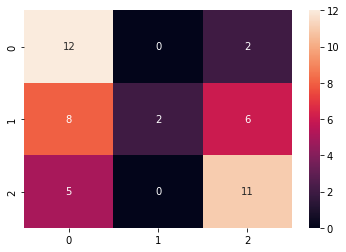

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
# predict the classes of new, unseen data
# Creates a confusion matrix
cm = confusion_matrix(y_test, yfitGrid)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g')

In [34]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy').fit(X_train, y_train)

# predict the classes of new, unseen data
predict_dtree = dtree.predict_proba(X_test)
predict_dtree.shape


(46, 3)

In [35]:
#import NB classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(X_train,y_train)

# Test the classifier
predict_nb = gnb.predict_proba(X_test)
predict_nb.shape


(46, 3)

In [36]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#Define k-value
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

#Estimate the accuracy of the classifier on test data
predict_knn=knn.predict_proba(X_test)
predict_knn.shape


(46, 3)

ROC Curve & AUC 

In [37]:
!pip install yellowbrick

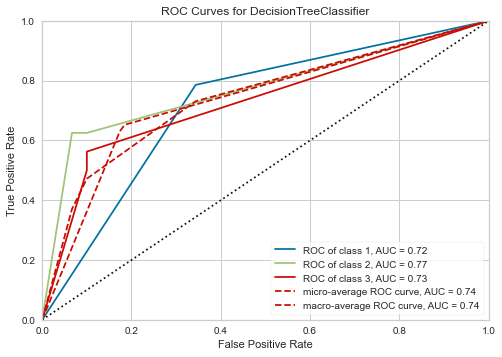

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
#Decision Tree 
#import module
from yellowbrick.classifier import ROCAUC
# Instaniate the classification model and visualizer
model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

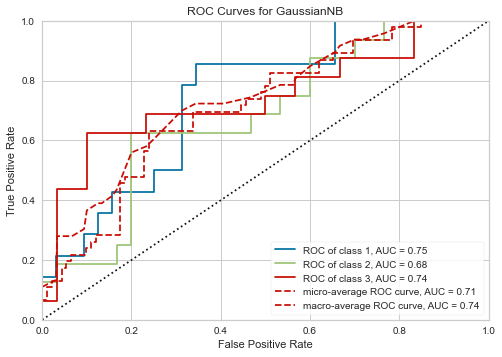

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
# Instaniate the classification model and visualizer
model = GaussianNB()
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

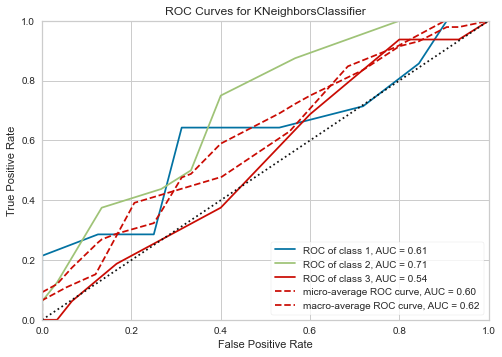

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
# Instaniate the classification model and visualizer
model = KNeighborsClassifier(n_neighbors=18)
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

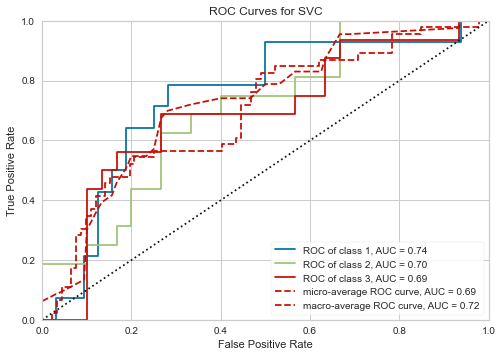

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
# Instaniate the classification model and visualizer
model = SVC(C= 50, gamma= 0.005, kernel= 'poly')
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

The ROC is a measure of a classifier's predicitve quality, the higher the AUC, the better the model generally is. However, it is also important to examine the gradient of the ROC, as this describes the maximization of the TPR while minimizing the FPR. 
In our dataset, the target feature demonstrate a multiclass classification properties, wherein 1,2&3. 
ROC curve is aptly to perform metrics for binary classifiers, while in our case multi-class ROC AUC curvesx, it needs to be addressed by binarizing to 'ovr' or 'ovo' strategies of classifcation. 

Decision model outperforms the other machine learning algorithms in term of area under curve. 